# Implement the OvA model for classification

- Your Name:郭凯宇
- Your ID:2020141470135

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) 

def LogisticOVAModel(w, x):
    k=np.dot(w,x)
    a=sigmoid(k)
    return a

def cost(a, y):
    t=0
    for j in range (0,a.shape[1]):
        for i in range (0,a.shape[0]):
            t+=y[i][j]*math.log(a[i][j],10)+(1-y[i][j])*math.log((1-a[i][j]),10)
    J=-t/a.shape[1]
    return J
def grad(a, x, y):
    gw = np.dot((a-y),np.transpose(x))/60
    return gw

In [3]:
def accuarcy(pred, label):
    pred_idx = np.argmax(pred, axis=0)
    label_idx = np.argmax(label, axis=0)
    return np.mean(pred_idx==label_idx)*100
        
def grad_decent(model, w, train_x, train_y, test_x, test_y, alpha=0.01, max_iters=1000, display_period=50):
    train_costs = []
    train_accs = []
    test_costs = []
    test_accs = []
    
    for k in range(max_iters):
        #train
        train_a = model(w, train_x)
        grad_w = grad(train_a, train_x, train_y)
        w = w - alpha* grad_w
        
        if k % display_period == 0:
            train_cost = cost(train_a, train_y)
            train_costs.append(train_cost)
            train_acc = accuarcy(train_a, train_y)
            train_accs.append(train_acc)

            test_a = model(w, test_x)
            test_cost = cost(test_a, test_y)
            test_costs.append(test_cost)
            test_acc = accuarcy(test_a, test_y)
            test_accs.append(test_acc)
            
            print("iter={:4d} train_cost={:.4f}, train_acc=[{:.2f}] test_cost={:.4f}, test_acc=[{:.2f}]".format(k, train_cost,train_acc,test_cost,test_acc))
    
    ### plot figures
    plt.figure()
    plt.plot([i*display_period for i in range(len(train_costs))], train_costs, 'r-', label="train_costs")
    plt.plot([i*display_period for i in range(len(test_costs))], test_costs, 'b-', label="test_costs")
    plt.legend()
    plt.figure()
    plt.plot([i*display_period for i in range(len(train_accs))], train_accs, 'r-^', label="train_accs")
    plt.plot([i*display_period for i in range(len(test_accs))], test_accs, 'b-^', label="test_accs")
    plt.legend()
    
    train_a = model(w, train_x)
    train_acc = accuarcy(train_a, train_y)
    test_a = model(w, test_x)
    test_acc = accuarcy(test_a, test_y)
    
    
    return train_acc, test_acc        

Text(0.5,1,'test data')

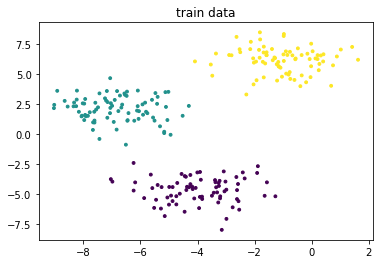

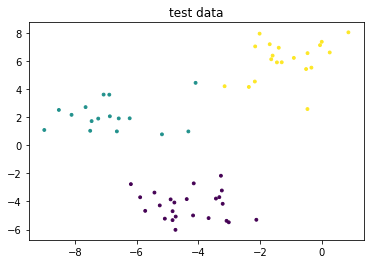

In [4]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

plt.figure()
plt.scatter(x_train[0,:],x_train[1,:],c=y_train,s=8)
plt.title("train data")
plt.figure()
plt.scatter(x_test[0,:],x_test[1,:],c=y_test,s=8)
plt.title("test data")

In [5]:
def idx2oneHot(y,num_class):
    onehot = (np.arange(num_class) == y[:, None]).astype(np.float32)
    return onehot.transpose()

In [6]:
num_class = 3

train_x = np.concatenate([x_train, np.ones((1, x_train.shape[1]))])
print("new shape of train x:{}".format(train_x.shape))

test_x = np.concatenate([x_test, np.ones((1, x_test.shape[1]))])
print("new shape of test x:{}".format(test_x.shape))

train_y = idx2oneHot(y_train, num_class)
test_y = idx2oneHot(y_test, num_class)
print("new shape of train y:{}".format(train_y.shape))
print("new shape of test y:{}".format(test_y.shape))

new shape of train x:(3, 240)
new shape of test x:(3, 60)
new shape of train y:(3, 240)
new shape of test y:(3, 60)


iter=   0 train_cost=1.5225, train_acc=[35.00] test_cost=1.5965, test_acc=[26.67]
iter=  50 train_cost=0.4935, train_acc=[97.08] test_cost=0.5219, test_acc=[91.67]
iter= 100 train_cost=0.4256, train_acc=[99.58] test_cost=0.4493, test_acc=[98.33]
iter= 150 train_cost=0.3938, train_acc=[99.58] test_cost=0.4166, test_acc=[100.00]
iter= 200 train_cost=0.3713, train_acc=[100.00] test_cost=0.3939, test_acc=[100.00]
iter= 250 train_cost=0.3531, train_acc=[100.00] test_cost=0.3756, test_acc=[100.00]
iter= 300 train_cost=0.3374, train_acc=[100.00] test_cost=0.3599, test_acc=[100.00]
iter= 350 train_cost=0.3236, train_acc=[100.00] test_cost=0.3461, test_acc=[100.00]
iter= 400 train_cost=0.3110, train_acc=[100.00] test_cost=0.3335, test_acc=[100.00]
iter= 450 train_cost=0.2996, train_acc=[100.00] test_cost=0.3221, test_acc=[100.00]
iter= 500 train_cost=0.2891, train_acc=[100.00] test_cost=0.3116, test_acc=[100.00]
iter= 550 train_cost=0.2794, train_acc=[100.00] test_cost=0.3018, test_acc=[100.00]

(100.0, 100.0)

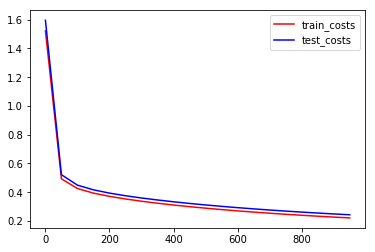

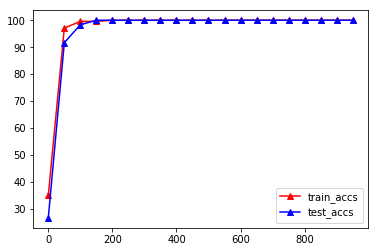

In [7]:
w = np.random.rand(train_x.shape[0], train_y.shape[0])
grad_decent(LogisticOVAModel, w, train_x, train_y, test_x, test_y, alpha=0.01, max_iters=1000, display_period=50)